# Oversampling
### This notebook is practice to oversample data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = os.path.join("..","..","data","train.csv"); csv_path_test = os.path.join("..","..","data","test.csv")
train_data = pd.read_csv(csv_path); test_data = pd.read_csv(csv_path_test)

In [3]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## DO NOT SAMPLE BEFORE SPLITTING DATASET
 - Use train_test_split first, than oversample.
 - Model predictions will be inaccurate if duplicate data exists in trainand test data

In [4]:
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=["ID_code","target"])
y = train_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio="minority")
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [ ]:
pd.DataFrame(y_train_sm).describe()

,0
count,251732.000000
mean,0.500000
std,0.500001
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


### Now that the training data is oversampled to be 50-50, how has the distribution changed?

C:\Users\mtoriello0725\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


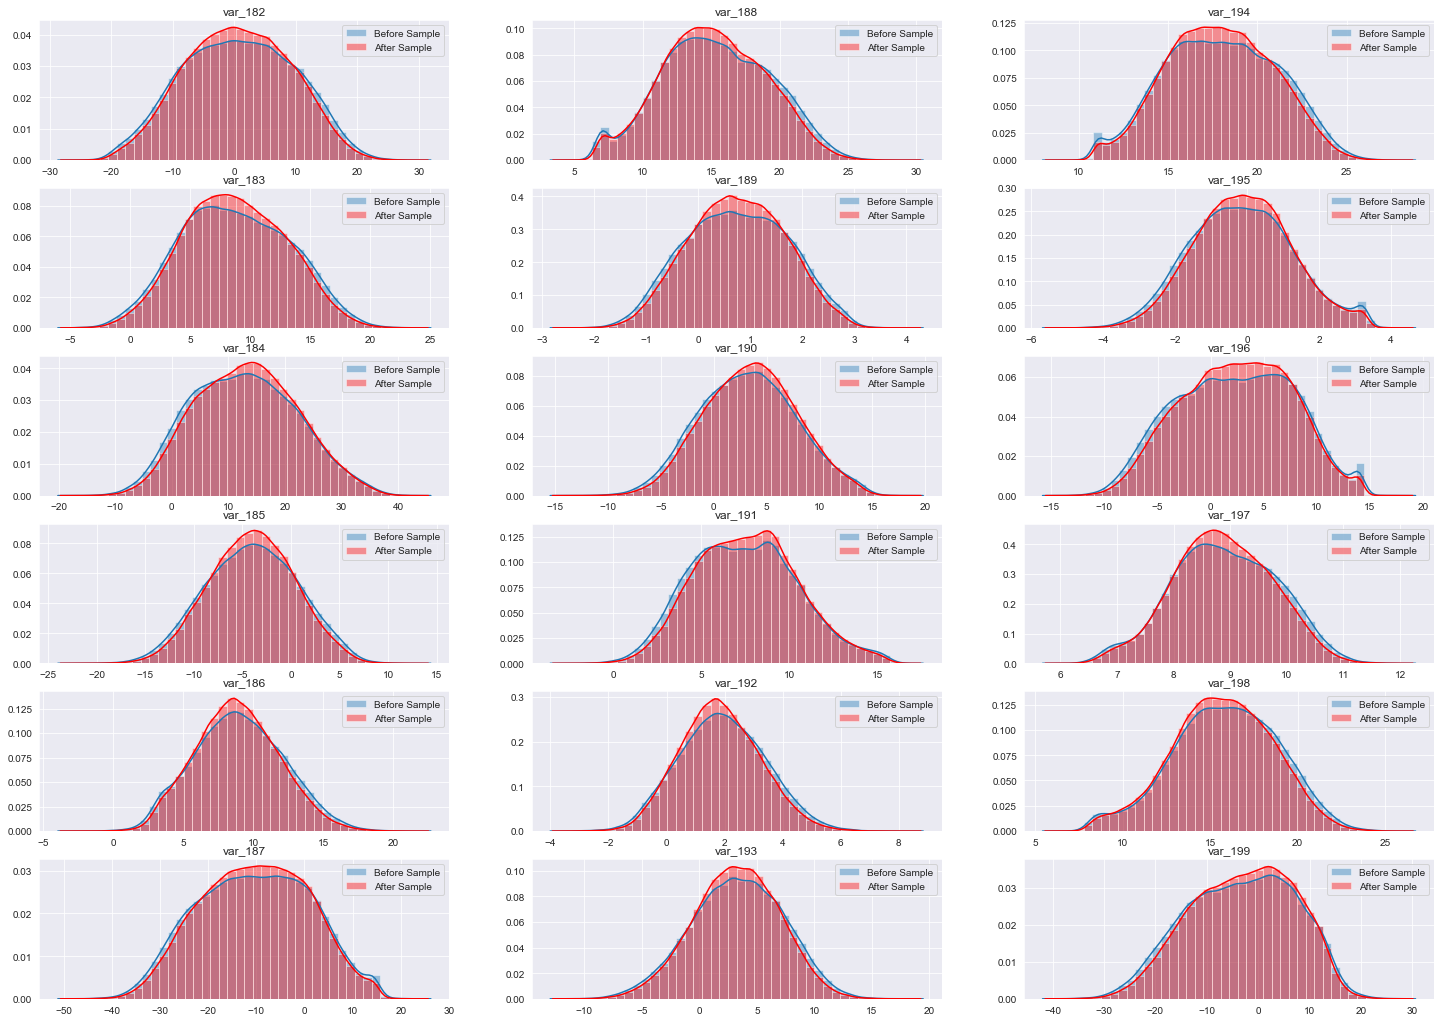

In [ ]:
# Convert to dataframes
X_train_df = pd.DataFrame(X_train)
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train_df.columns.values)

sns.set_style(style="darkgrid")
fig, axes= plt.subplots(6,3,figsize=(25,18))

# Pick N in between 0 and 200-18
N = 182

bin_size = 40

for count in range(0,18):
    if count < 6:
        i = count
        j = 0
    elif count < 12:
        i = count - 6
        j = 1
    else:
        i = count - 12
        j = 2
        
    sns.distplot(X_train_df.iloc[:,N+count], ax=axes[i][j], bins = bin_size, label="Before Sample")
    sns.distplot(X_train_sm_df.iloc[:,N+count], ax=axes[i][j], color="red", bins=bin_size, label="After Sample")
    axes[i][j].set_title(X_train_sm_df.iloc[:,N+count].name)
    axes[i][j].set_xlabel("")
    axes[i][j].legend(["Before Sample","After Sample"])
    
plt.show()

## Try Oversampling combined with undersampling

In [ ]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(ratio="minority")
X_train_smtomek, y_train_smtomek = smote_tomek.fit_sample(X_train, y_train)

In [ ]:
# Convert to dataframes
X_train_df = pd.DataFrame(X_train)
X_train_smtomek_df = pd.DataFrame(X_train_smtomek, columns=X_train_df.columns.values)

sns.set_style(style="darkgrid")
fig, axes= plt.subplots(6,3,figsize=(25,18))

# Pick N in between 0 and 200-18
N = 182

bin_size = 40

for count in range(0,18):
    if count < 6:
        i = count
        j = 0
    elif count < 12:
        i = count - 6
        j = 1
    else:
        i = count - 12
        j = 2
        
    sns.distplot(X_train_df.iloc[:,N+count], ax=axes[i][j], bins = bin_size, label="Before Sample")
    sns.distplot(X_train_smtomek_df.iloc[:,N+count], ax=axes[i][j], color="red", bins=bin_size, label="After Sample")
    axes[i][j].set_title(X_train_df.iloc[:,N+count].name)
    axes[i][j].set_xlabel("")
    axes[i][j].legend(["Before Sample","After Sample"])
    
plt.show()

## SMOTEENN
- uses nearest neighbors, which may cause to be incredibly slow... much like using Tomek links above.

https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py